<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/CNN_homework/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv #thư viện opencv để xử lý ảnh thô chuyển thành dữ liệu
import numpy as np # thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh


In [3]:
X = []#tạo list chứa dữ liệu ảnh
y = []#tạo list chứa label của từng ảnh
labels = os.listdir('/content/drive/MyDrive/food')#gọi biến labels là list gồm các thư mục data con chứa ảnh 

#tạo đường dẫn vào vào dataset
path='/content/drive/MyDrive'
dataset = 'food'

#cho biến label trong vòng lặp list labels 
for label in labels:
        
        # Và lặp các ảnh trong thư mục
        for file in os.listdir(os.path.join(path, dataset, label)):
            # đọc ảnh            
            image = cv.imread(os.path.join(path, dataset, label, file),cv.IMREAD_UNCHANGED)
            #chuyển ảnh cấu trúc màu BGR thành RGB
            image =cv.cvtColor(image,cv.COLOR_BGR2RGB)
            image =cv.GaussianBlur(image,(5,5),0,0)
            # chuyển tên các label thành dạng số 
            classnum = labels.index(label)
            #đưa shape ảnh về kích thước 50x50
            img = cv.resize(image,(200,200))
            img = cv.normalize(img, None, alpha=0,beta=255, norm_type=cv.NORM_MINMAX)

            #đưa dữ liệu ảnh đc xử lý vào list X          
            X.append(img)
            #đưa dữ liệu label vào list y
            y.append(classnum)

In [4]:
#đưa list X về dữ liệu dạng mảng tensor
X= np.array(X)
#đưa list y vễ dạng mảng
y= np.array(y)

In [5]:
import matplotlib.pyplot as plt


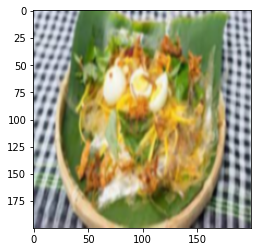

In [10]:
plt.imshow(X[2])

In [43]:
y.shape

(422,)

In [7]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(X.shape[0]):
  xi = tf.image.flip_left_right(X[i])
  yi = y[i]
  x_leftright.append(xi)
  y_leftright.append(yi)

In [8]:
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)

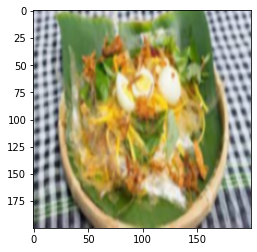

In [9]:
plt.imshow(x_leftright[2])

In [11]:
import tensorflow as tf 
x_updown = []
y_updown  = []
for i in range(X.shape[0]):
  xj = tf.image.flip_up_down(x_leftright[i])
  yj = y_leftright[i]
  x_updown.append(xj)
  y_updown.append(yj)

In [12]:
x_updown = np.array(x_updown)
y_updown = np.array(y_updown)

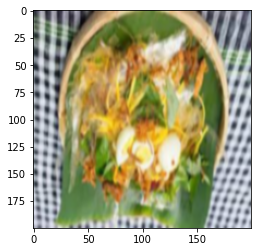

In [13]:
plt.imshow(x_updown[2])

In [14]:
X_train = np.concatenate((X,x_leftright,x_updown))
Y_train = np.concatenate((y,y_leftright,y_updown))

In [15]:
X_train.shape

(1266, 200, 200, 3)

In [16]:
Y_train.shape

(1266,)

In [17]:
#xáo trộn trật tự của dữ liệu và nhãn
keys = np.array(range(X_train.shape[0]))
np.random.shuffle(keys)
X_train = X_train[keys]
Y_train = Y_train[keys]

In [18]:
Y_train

array([8, 1, 8, ..., 4, 3, 8])

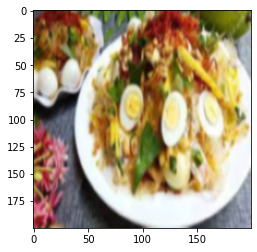

In [20]:
plt.imshow(X[1])

In [21]:
from tensorflow.keras.utils import to_categorical
#onehot label y 
Y_train= to_categorical(Y_train,10)

In [22]:
Y_train.shape

(1266, 10)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [24]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('final.h5')

Epoch 1/30
18/18 [==============================] - 22s 456ms/step - loss: 2.0925 - accuracy: 0.3161 - val_loss: 17.3700 - val_accuracy: 0.1024
Epoch 2/30
18/18 [==============================] - 2s 138ms/step - loss: 1.1097 - accuracy: 0.6198 - val_loss: 6.5276 - val_accuracy: 0.2047
Epoch 3/30
18/18 [==============================] - 3s 139ms/step - loss: 0.4743 - accuracy: 0.8674 - val_loss: 5.7531 - val_accuracy: 0.2126
Epoch 4/30
18/18 [==============================] - 2s 139ms/step - loss: 0.1643 - accuracy: 0.9701 - val_loss: 3.4582 - val_accuracy: 0.3228
Epoch 5/30
18/18 [==============================] - 3s 140ms/step - loss: 0.0679 - accuracy: 0.9903 - val_loss: 2.7894 - val_accuracy: 0.3465
Epoch 6/30
18/18 [==============================] - 3s 141ms/step - loss: 0.0284 - accuracy: 0.9982 - val_loss: 2.5438 - val_accuracy: 0.3386
Epoch 7/30
18/18 [==============================] - 3s 140ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 2.0938 - val_accuracy: 0.5039
Epoc

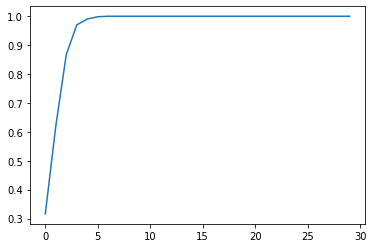

In [27]:
plt.plot(history.history['accuracy'])

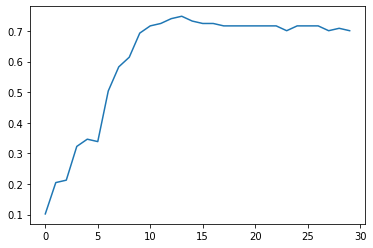

In [28]:
plt.plot(history.history['val_accuracy'])

In [ ]:
#9:xoi
#6:botloc
#0:pho
#8:banhtrangtron
#5:cơm ga
#1:BANH CUON
#4:CƠM SƯỜN
#3:BÚN ĐẬU
#7:MÌ VỊ TIỀM
#2:THITKHO
labels= {0:'pho',
         1:'banhcuon',
         2:'thitkho',
         3:'bundau',
         4:'com suon',
         5:'com ga',
         6:'bánh bột lọc',
         7:'mì vịt tiềm',
         8:'bánh tráng trộn',
         9:'xoi'}

[[6.1572880e-02 4.8775200e-07 9.3772207e-05 9.3820530e-01 2.0285320e-08
  4.4095856e-08 1.3725558e-05 5.6156221e-08 2.0899479e-05 9.2822505e-05]]
độ chính xác: 93 %
expectation Com ga xoi mo


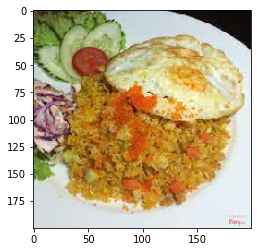

In [30]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img
model = load_model('final.h5')
	# load model
img = load_image('comchien.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(51,51),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[2.5783663e-06 2.7907888e-06 9.9930429e-01 2.6211338e-04 4.5972982e-08
  2.7092212e-06 1.2603351e-04 1.9202591e-06 2.9632871e-04 1.2355503e-06]]
độ chính xác: 99 %
expectation Com tam


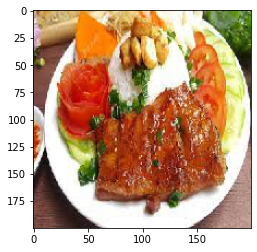

In [31]:
img = load_image('com.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[1.7059144e-03 2.1942458e-04 2.7114043e-05 9.9292821e-01 8.9355221e-05
  3.9966603e-06 1.1331920e-03 6.2880069e-08 6.9920375e-04 3.1935573e-03]]
expectation Com ga xoi mo
độ chính xác: 99 %


0.9929282

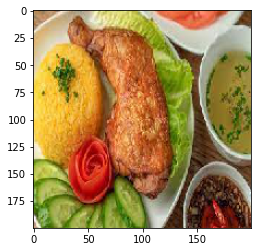

In [32]:
img = load_image('comga.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(75,75),0,0)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[3.6307765e-04 7.5738974e-02 2.0576213e-02 1.2656493e-05 3.6716137e-02
  1.7517015e-04 3.1915703e-01 5.4372829e-01 1.9984436e-03 1.5339734e-03]]
expectation Pho bo
độ chính xác: 54 %


0.5437283

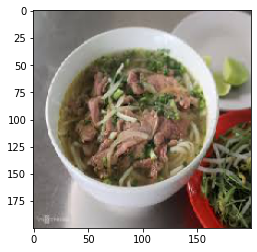

In [33]:
img = load_image('bunbo.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[1.1909051e-03 4.2003317e-06 4.9710470e-05 1.4382323e-06 5.9743201e-07
  1.1001543e-04 1.3114726e-04 9.9829930e-01 6.7818917e-08 2.1269706e-04]]
expectation Pho bo
độ chính xác: 99 %


0.9982993

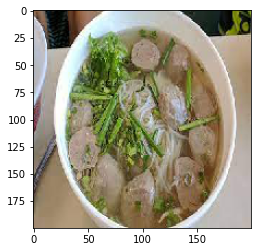

In [37]:
img = load_image('hutieubovien.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[0.01288191 0.00320949 0.02085224 0.03491729 0.31966054 0.00297135
  0.43474513 0.12692232 0.04236461 0.00147514]]
expectation Xoi man
độ chính xác: 43 %


0.43474513

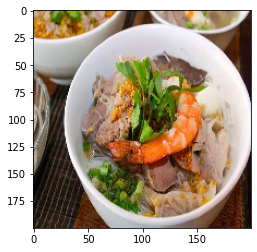

In [38]:
img = load_image('hutieunamvang.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[1.47232823e-02 1.16051316e-01 2.00646362e-04 1.48021297e-06
  4.62484309e-08 4.83305939e-07 3.72244040e-06 1.66028019e-06
  8.69010627e-01 6.71223734e-06]]
expectation Thit kho
độ chính xác: 86 %


0.8690106

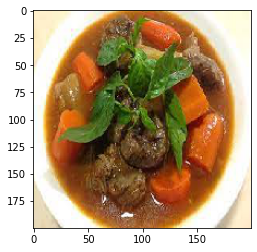

In [39]:
img = load_image('bokho.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[9.0257967e-01 4.2868987e-07 2.3316259e-04 7.2379798e-02 1.7259094e-03
  2.3394017e-04 2.2195814e-02 4.6515612e-07 5.5298846e-05 5.9558015e-04]]
expectation banh trang tron
độ chính xác: 90 %


0.90257967

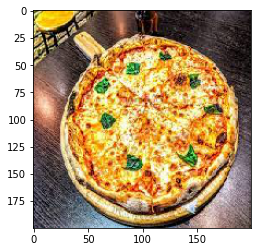

In [42]:
img = load_image('pizza.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[4.9789679e-01 6.0380620e-07 3.7051395e-02 7.4779869e-05 2.6768071e-03
  7.9587735e-03 4.5414832e-01 9.9667370e-05 6.3043999e-06 8.6656371e-05]]
expectation banh trang tron
độ chính xác: 49 %


0.4978968

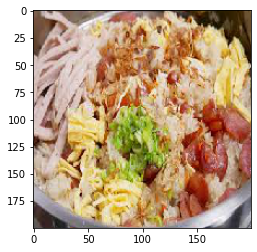

In [41]:
img = load_image('xoiga.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[1.41787517e-03 2.52818040e-06 2.02056646e-04 8.42139998e-05
  4.47970703e-02 5.55618227e-01 3.80264670e-01 1.75010320e-02
  4.81099869e-06 1.07513784e-04]]
expectation banh cuon
độ chính xác: 55 %


0.5556182

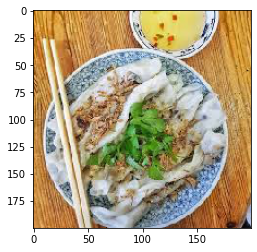

In [44]:
img = load_image('banhcuon.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[7.8597516e-08 3.9862198e-07 2.9066932e-05 1.3808942e-09 1.1659549e-08
  9.9834108e-01 5.8293635e-06 1.5306762e-04 6.6352048e-09 1.4705287e-03]]
expectation banh cuon
độ chính xác: 99 %


0.9983411

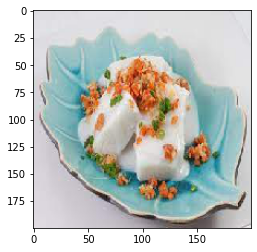

In [45]:
img = load_image('banhduc.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[2.9768471e-06 2.5045940e-06 4.2463015e-03 3.5584677e-07 3.6944877e-07
  9.7780502e-01 6.3864682e-03 7.6678228e-03 4.4036169e-06 3.8837942e-03]]
expectation banh cuon
độ chính xác: 97 %


0.977805

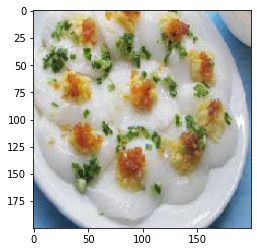

In [46]:
img = load_image('banhbeo.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[2.6204295e-03 1.0949357e-04 1.1798957e-03 4.9219666e-06 2.5568201e-05
  1.2218502e-03 1.3856356e-01 3.0860271e-02 1.6778633e-06 8.2541233e-01]]
expectation banh bot loc
độ chính xác: 82 %


0.82541233

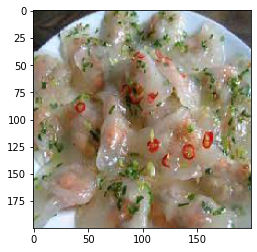

In [47]:
img = load_image('banh_beo_nghe_an.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[4.7410778e-03 7.7134278e-04 8.3277380e-04 1.3433187e-04 9.1987774e-02
  3.1165377e-04 1.1299770e-02 8.8544595e-01 4.1783838e-05 4.4335038e-03]]
expectation Pho bo
độ chính xác: 88 %


0.88544595

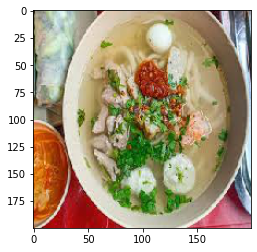

In [50]:
img = load_image('banhcanh.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[9.0830512e-02 1.4940719e-04 1.9696906e-02 2.4935556e-05 1.7593121e-06
  3.5076288e-03 7.9766065e-02 8.0367184e-01 4.1451422e-05 2.3094760e-03]]
expectation Pho bo
độ chính xác: 80 %


0.80367184

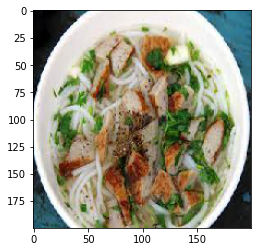

In [57]:
img = load_image('banhcanhchaca.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)

[[1.4903110e-01 3.3623555e-03 3.9941698e-04 1.4696240e-01 1.6921356e-06
  1.5256116e-02 6.1092126e-01 1.5361715e-05 9.6016303e-03 6.4448729e-02]]
expectation Xoi man
độ chính xác: 61 %


0.61092126

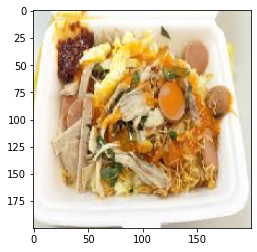

In [61]:
img = load_image('xoiga.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)

print('expectation',labels[np.argmax(result)]) 
print('độ chính xác:', int(np.max(result)*100),'%')
np.max(result)